# Viz Group Project - First Version
**Group 5:** Sydney Akers, Yan Cao, Kailin Hu, Jun Xing

In [1]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## 3 Key Findings

### Finding 1: Impact of Major Events on Viewership, Ratings, and Deaths



**Making Of:**

The dataset we used is about viewership and ratings data for each episode from seasons 1 through 7.  The viewership was from Wikipedia and ratings were from IMDB:
https://en.wikipedia.org/wiki/Game_of_Thrones#Viewer_numbers
https://www.imdb.com/title/tt0944947/episodes

We manually inputted both these sets of data into Excel.  Each attribute was from a different source so we combined these data together into one CSV file.  Next, we read the CSV into Python and grouped by Season, and then by episode to get the aggregate number of viewers and maximum rating per episode.

Next, to create the actual line graph with two lines (viewership and ratings), we use the groupby dataframe's index as the x-variable (represents episodes in sequential order) and the aggregated viewership and max ratings as the y-variables.  We used plt.plot to add two lines on the same plot. Then we used annotation functions to add annotated texts.

In [2]:
#read in viewership & ratings dataset
url2 = "https://raw.githubusercontent.com/allisonyanc/Viz-Group-Project/master/Viewership%20%26%20Rating.csv"
view_rat = pd.read_csv(url2)
view_rat.head(3)

,Season,Episode,Viewers (millions),Ratings
0,1,1,2.22,9.0
1,1,2,2.20,8.8
2,1,3,2.44,8.7


In [3]:
#groupby and create new column with season & episode together:
gb = view_rat.groupby(['Season', 'Episode']).agg({'Viewers (millions)': 'max', 'Ratings': 'max'}).reset_index()

gb['seas_epi'] = gb['Season'].astype(str) + '.' + gb['Episode'].astype(str)
gb['seas_epi'].astype('float').head(5)

0    1.1
1    1.2
2    1.3
3    1.4
4    1.5
Name: seas_epi, dtype: float64

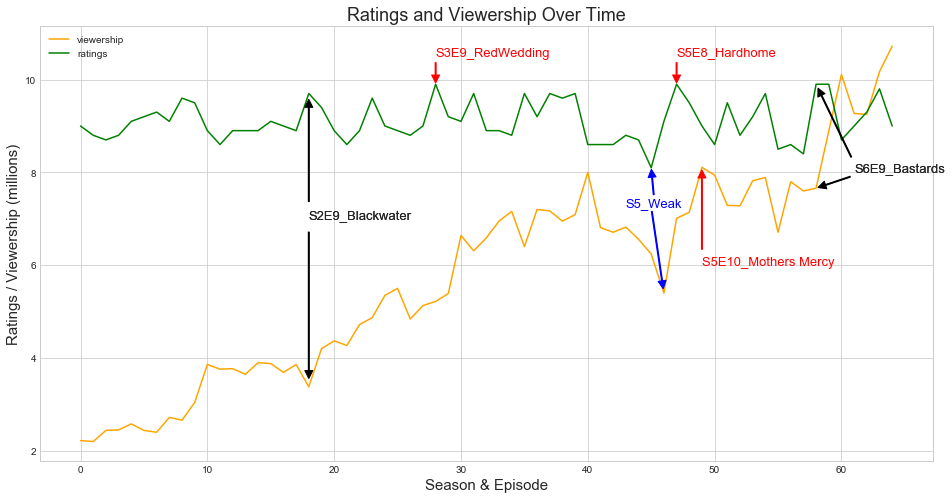

In [4]:
x = gb.index[:65]
y = gb['Viewers (millions)'][:65]
z = gb['Ratings'][:65]

sns.set_style("whitegrid")

fig=plt.figure(figsize=(16,8))
plt.plot(x, y, color='orange', label='viewership')
plt.plot(x, z, color='green', label='ratings')

plt.title("Ratings and Viewership Over Time", size=18)
plt.xlabel("Season & Episode", size=15)
plt.ylabel("Ratings / Viewership (millions)", size=15)

plt.legend()

# Adding arrows and texts:
ax = fig.add_subplot(111)

# season 2:
ax.annotate('S2E9_Blackwater', xy=(18, 9.7), xytext=(18, 7), fontsize=13,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8,headlength=8),)
ax.annotate('S2E9_Blackwater', xy=(18, 3.38), xytext=(18, 7), fontsize=13,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8,headlength=8),)
# season 3:
ax.annotate('S3E9_RedWedding', xy=(28, 9.9), xytext=(28, 10.5), color='red', fontsize=13,
            arrowprops=dict(facecolor='red', edgecolor='red',shrink=0.05, width=1, headwidth=8,headlength=8),)
# season 5:
ax.annotate('S5E8_Hardhome', xy=(47, 9.9), xytext=(47, 10.5), color='red', fontsize=13,
            arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05, width=1, headwidth=8,headlength=8),)
ax.annotate('S5E10_Mothers Mercy', xy=(49, 8.15), xytext=(49, 6), color='red', fontsize=13,
            arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05, width=1, headwidth=8,headlength=8),)
ax.annotate('S5_Weak', xy=(45, 8.1), xytext=(43, 7.25), color='blue', fontsize=13,
            arrowprops=dict(facecolor='blue', edgecolor='blue', shrink=0.05, width=1, headwidth=8,headlength=8),)
ax.annotate('', xy=(46, 5.4), xytext=(45, 7.25), fontsize=13,
            arrowprops=dict(facecolor='blue', edgecolor='blue', shrink=0.05, width=1, headwidth=8,headlength=8),)
# season 6:
ax.annotate('S6E9_Bastards', xy=(58, 9.9), xytext=(61, 8), fontsize=13,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8,headlength=8),)
ax.annotate('S6E9_Bastards', xy=(58, 7.66), xytext=(61, 8), fontsize=13,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8,headlength=8),)

#### The Most Controversial Episodes: [Black Labels]  
[There are some episodes with controversial contexts and viewer opinions, which makes the viewership and ratings moving to the opposite directions.]  
- **S2E9 - Battle of Blackwater:** 
    * Why it was awesome: It was Cersei at her most Cersei-ish as she holed herself up with a ton of wine while Joffrey abandoned his men just when they needed him most and Tyrion rising up to lead the Lannisters to almost a victory. 
    * Why it was meh: Tyrion's usually the only Lannister we're rooting for, and the day had to be saved by his dad.
    
- **S6E9 - The Battle of the Bastards:** 
    * Why it was awesome: All our favorite people won, Ramsay was destroyed, and the Starks took back Winterfell. Plus, it was incredible to watch, and incredibly satisfying. 
    * Why it was meh: Was there ever really any chance that Ramsay would win? Everyone we love lived, and even when it looked totally impossible for the Starks to win, they still somehow did. Everything happened as our hearts wanted, which is fine for our hearts, but not very surprising TV. 


#### The Most Popular Episodes:  <font color='red'>[Red Labels]</font>  
<font color='red'>[Here are some of the most popular episodes with most memoriable scences, which in the plot the lines hit the peaks of ratings and then drive the viewership to increase.]</font>  
- **S3E9 - Red Wedding:**  
    * Ask any Game of Thrones fan which moment they think defines the series, and they’ll answer you with The Red Wedding. If they don’t, chances are that they’re lying. It’s the series’ biggest, most shocking moment. With one fell swoop, the Stark rebellion has all but extinguished, and the Lannister forces are stronger than ever. Robb Stark dies, his wife dies, and so does Catelyn Stark.
    
- **S5E8 - Hardhome:** 
    * After convincing most of the wildlings to aid the Night's Watch in their battle against the White Walkers, Jon learned that the battle had already arrived at Hardhome. While the wildlings fled, Jon, the brothers of the Night's Watch, and Tormund defended as best they could, with Jon even killing one Walker using dragonglass. Forced to retreat, Jon looked on in horror as the Night's King raised the dead, revealing the startling truth behind just what (and who) it is they're fighting.

- **S5E10 - Mother's Mercy:**
    * One of the briefer, and more frustrating, battles – he might've been battling Ramsay's forces, but Stannis Baratheon's combination of bad planning and daughter-burning diminished audience sympathy to such an extent we didn't know who to root for.


#### The Weakest Season: <font color='blue'>[Blue Labels]</font>  
<font color='blue'>[As mentioned above, season 5 could be the weakest in all the 7 seasons. A quick online search for more context shows that season 5 episode 6 ended in a highly controversial and violent scene that, according to online reviewers, seemed to trivialize the issue of rape and it was an overly extreme scene to include, even for Game of Thrones.]</font>   
- **Season 5:** 
    * It’s no secret that Game of Thrones made a mess of its Dorne subplot, and with the events taking place in season 7, it’s clear that the showrunners want to end its story and completely forget about it.It’s one of the main reasons why most people view season 5 as the series’ weakest. While many grumble about the poor characterisation of the Sand Snakes and nonsensical decisions made by Ellaria Sand, what truly condemns the plotline is how much it diverts from a very engaging story in the books.  
  
References:  
1) https://www.eonline.com/news/773980/which-game-of-thrones-battle-was-the-best-battle-of-all  
2) http://www.digitalspy.com/tv/game-of-thrones/feature/a834169/game-of-thrones-ranking-the-battles/

### Finding 2: Betrayals at the House and Character Level 
We found that at the house level, there is a certain degree of moral ambiguity in every major house.  However, at the character level, it is clear that villains perpetrate more betrayals than heroes.

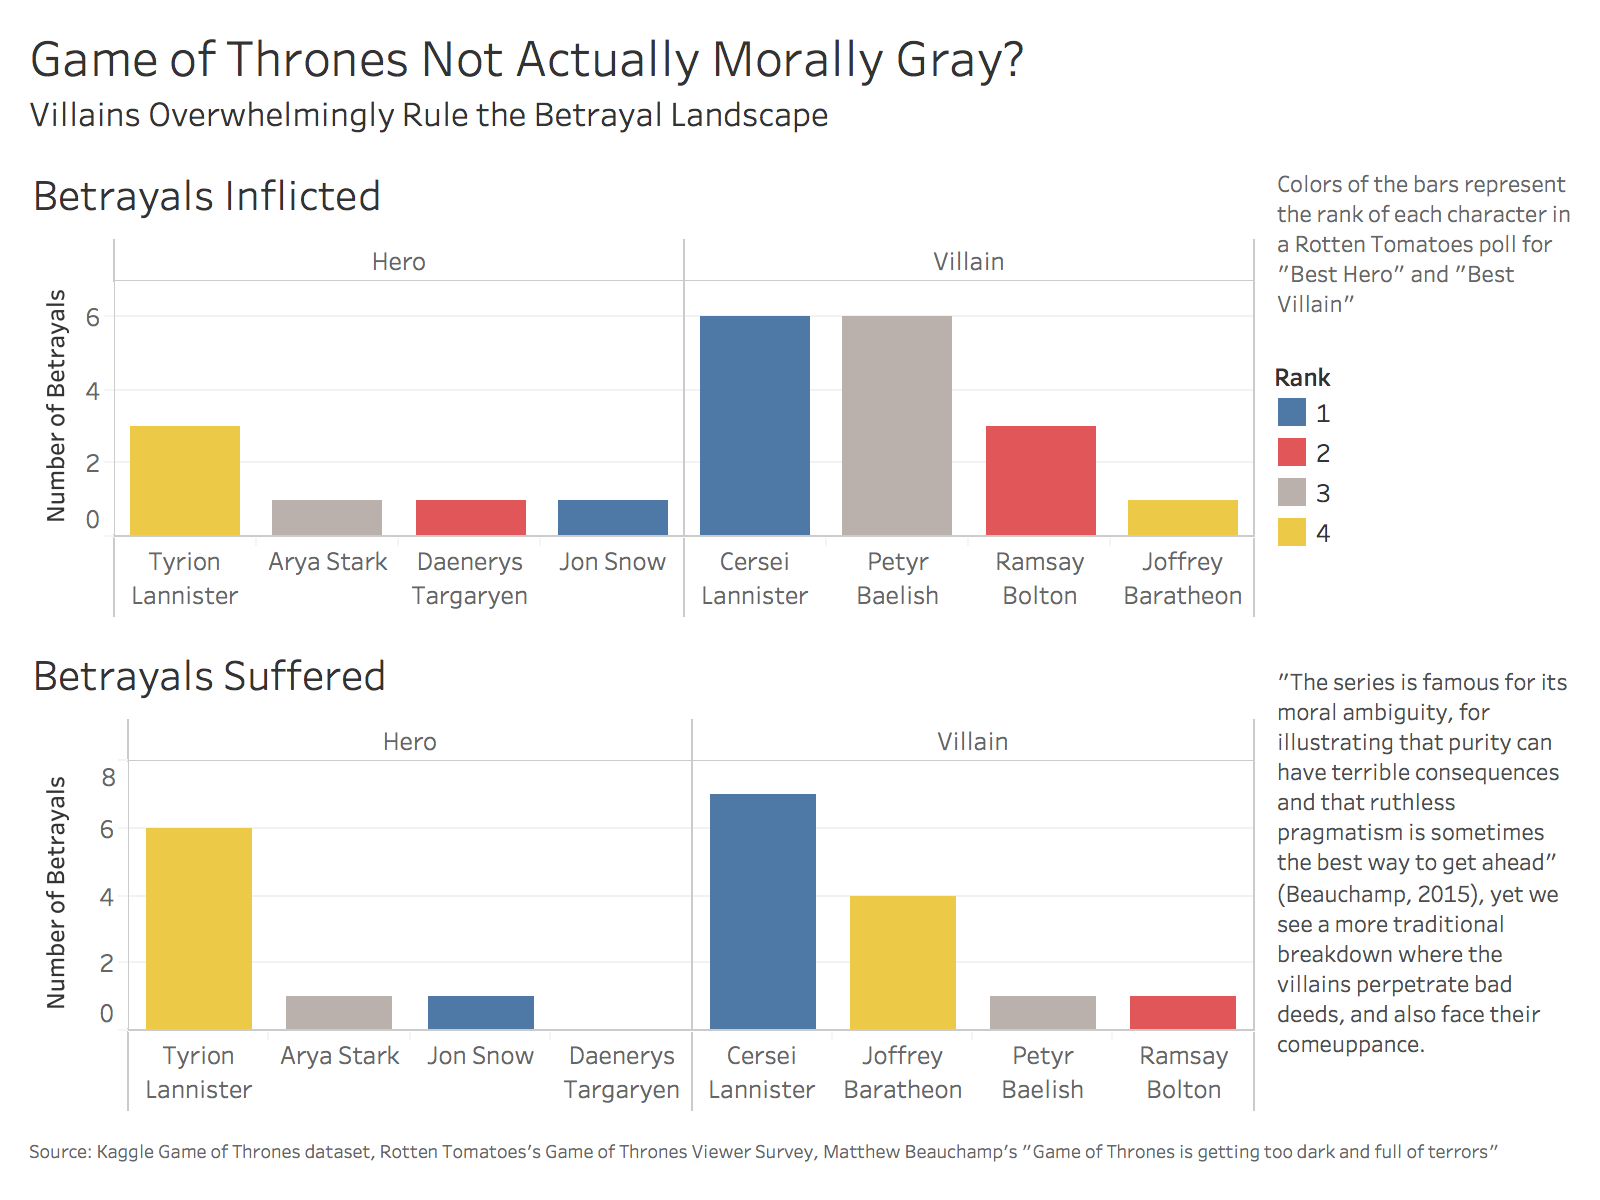

In [10]:
from IPython.display import Image
Image(filename="GoTbetrayalsv1.png")

### Betrayals of Heroes and Villains of Game of Thrones (character level)

**Rationale**:

As viewers of Game of Thrones, we know that the TV series has a reputation for moral ambiguity.  From season 1’s shocking death of the virtuous Ned Stark to the questionable political moves and vicious betrayals perpetrated by heroes and villains alike, Game of Thrones fans are accustomed to the moral gray areas often eschewed by the fantasy genre.  As Mark Dunbar notes that in more traditional fantasy universes, "redemption is inevitable, impossible, or undesirable. In Martin’s fictional universe, redemption is simply something struggled toward“ (https://thehumanist.com/arts_entertainment/culture/moral-ambiguity-game-thrones) Thus, we thought it would be nice to confirm this with data on fans’ favorite heroes and villains and the betrayals inflicted and betrayals suffered over the course of the series.  We expected to see the heroes, who are just as ensconced in the intricate politics of the Seven Kingdoms as the villains, to have perpetrated and been victim to similar numbers of betrayals; however, this is not the case.  The villains clearly have betrayed and been betrayed more often than the heroes throughout Game of Thrones, which is a much more traditional (genre-wise at least) breakdown of betrayals: the villains scheme and betray, but also (possibly as a result) are victim to more betrayals as well.  We thought this was surprising considering the reputation of the series--fans’ still look to more virtuous heroes and slimy villains.  

**Data Wrangling**: 

The betrayals dataset was from venngage's dataset (https://docs.google.com/spreadsheets/d/1yfzwRZFY08EBgwfMYTY8BojB4GIfsOBLo0PQ2Hs8u5g/edit#gid=0), and the data on fans’ picks for top heroes and top villains was from a Rotten Tomatoes survey (https://editorial.rottentomatoes.com/article/game-of-thrones-viewer-survey/).  We filled in last names on the betrayals dataset so that it would be easier to join on other datasets and group by character.  See betrayal.csv and HeroesandVillains.csv for the data used.  

**Tableau**:

We did a left join (HeroesandVillains.csv joined with betrayal.csv) on Character and Perpetrator for the Betrayals Inflicted visualization and a left join on Character and Victim for the Betrayals Suffered visualization.  

Betrayals Inflicted: 
We created a group from “Hero or Villain?” and a subgroup from “Perpetrator.”  Then we placed those groups on the columns, and SUM(Number of Records) on the rows.  We hid the field labels for columns, changed the visualization title, and changed the axis title to “Number of Betrayals.”  Then we sorted the bars descending by group.  We converted rank to a dimension and dragged that to color.  We changed the colors for each rank to mimic the prize ribbon color system.  

Betrayals Suffered: 
We created a group from “Hero or Villain?” and a subgroup from “Victim”.  Then we placed those groups on the columns, and CNT(Impact) on the rows.  We hid the field labels for columns, changed the visualization title, and changed the axis title to “Number of Betrayals”.  Then we sorted the bars descending by group.  We converted rank to a dimension, and dragged that to color.  We changed the colors for each rank to mimic the prize ribbon color system.  

Combined Visualization: 
We created a dashboard with these two visualizations, removed one of the rank legends, added a title, added some explanation captions, and a caption for source citing.  

**Future Improvements**: 
It may or may not make the visualization more effective to combine the two graphs into one, and encode betrayals suffered vs betrayals inflicted as different colors (and maybe remove ranking information altogether).  Some rearranging of the captions may be useful as well.  


### Betrayals of House of Game of Thrones (house level)

**Rationale**:

Besides the character level of betrayals, viewers of Game of Thrones might also curious about the house level betrayals. For instance, people might have impressions that Lannisters are the most skeptical house and Starks are the most "pure" and innocent house, but is it true? In order to truthfully help viewers to understand  what is going on between those houses, we want to visualize which house got involved into betrayals the most, which house betrayed more than they got betrayed, which house is the most skeptical house up to the Season 6.
Also, we want to visualize the relations between people's favorite house and being a skeptical house.
              
**Data Wrangling**: 

The betrayals dataset was from Venngage's dataset (https://docs.google.com/spreadsheets/d/1yfzwRZFY08EBgwfMYTY8BojB4GIfsOBLo0PQ2Hs8u5g/edit#gid=0), and the data on fans’ picks for top favorite house survey (https://www.ranker.com/crowdranked-list/best-game-of-thrones-houses?utm_expid=16418821-409.ZHh11RFyTNmO_Mn5KtBY8w.0&utm_referrer=https%3A%2F%2Fwww.google.com%2F)We used group by function to arrange the data into house level and then inner merge them to a new dataframe. Besides the count numbers of betrayals, we calculated two different ratios for different purpose: 1: Betrayal ratio: count of times of got betrayed divided by the sum of got betrayed and betrayed . 2: Betrayed more often or less often ratio: count of times of betrayed minus times of got betrayed, then divided by times of got betrayed.
We exported the data to an excel file and then filled in the votings for favorite house manually. Finally we got a betrayal_by_house.csv file.

**Tableau**:

Total betrayal events:
We put the house into rows and then put perp count and victim count into columns.
Reversed the axis to compare the same house into 2 different senarios.
Change the color to red for betrayed and blue for got betrayed.

Betrayed more often or less often ratio graph: 
We put the house into columns and the ratio into the row.
Set 2 sets for adding different colors.

Betrayal ratio graph: 
We put the house into columns and the ratio into the row.
Put the votings into colors.
Set the color into red blending into blue for better contrast.

Combined Visualization: 
We created a dashboard with these three visualizations, added a title, added some explanation captions, and a caption for source citing.  

**Future Improvements**: 
Put Betrayed more often or less often ratio graph into descending order.
Add the pictures of the house for better recall and understanding.


In [6]:
#read data
betrayal = pd.read_csv('https://raw.githubusercontent.com/allisonyanc/Viz-Group-Project/master/betrayal.csv', index_col=0)
betrayal.head()

,Season,Episode,Perpetrator,Perp Role,Perp House,Perp Gender,Victim,Relationship Perp-Victim,Victim Role,Victim House,Victim Gender,Perp Gain/Reasoning,Immediate Consequence,#Deaths,Geography,Impact,Notes
Betrayal,,,,,,,,,,,,,,,,,
Daenerys sold to Drogo,1,1,Varys,Master of Whisperers,Targaryen,M,Viserys Targaryen,Ally,Heir to House Targaryen,Targaryen,M,Power,Gain Ally,NaN,Across the Narrow Sea,1.0,NaN
Daenerys sold to Drogo,1,1,Viserys Targaryen,Heir to House Targaryen,Targaryen,M,Daenarys Targaryen,Brother,Heir to House Targaryen,Targaryen,F,Power,Gain Ally,NaN,Across the Narrow Sea,1.0,NaN
Sets Starks against Lannisters,1,1,Lysa Arryn,Lady Regent of the Vale,Arryn,F,Catelyn Starck,Sister,Wife of Ed Stark,Stark,F,Love,Set Starks against Lannisters,1,Winterfell,1.0,NaN
Cersei-Jaime Affair,1,1,Cersei Lannister,Queen (formerly),Lannister,F,Robert Baratheon,Wife,Lord of the Seven Kingdoms,Baratheon,M,Love,Rumors are circulating,NaN,"King's Landing, 7 Kindoms",2.0,NaN
Lysa poisons Jon,1,1,Lysa Arryn,Lady Regent of the Vale,Arryn,F,Jon Arryn,Wife,Hand of King,Arryn,M,Love,Power Change,1,"King's Landing, 7 Kindoms",1.0,NaN


In [7]:
#group by house
betrayal = betrayal[['Perp House', 'Victim House']]
perp = betrayal.groupby('Perp House').count().rename(columns={'Victim House': 'Perp Count'}).reset_index()
victim = betrayal.groupby('Victim House').count().rename(columns={'Perp House': 'Victim Count'}).reset_index()
print perp.head()
print victim.head()

#Merge perp house with victim house into one dataframe
result = perp.merge(victim, how='inner', left_on = ['Perp House'], right_on = ['Victim House'])
result = result.drop('Victim House', axis=1).rename(columns={'Perp House': 'House'})

#Add two different betrayal ratio
result['ratio'] = (result['Perp Count']) / (result['Perp Count'] + result['Victim Count'])
result['ratio2'] =  (result['Perp Count'] - result['Victim Count']) /(result['Victim Count']) 
result

  Perp House  Perp Count
0          -           2
1          ?           1
2      Arryn           2
3    Baelish           6
4  Baratheon           7
  Victim House  Victim Count
0        Arryn             4
1      Baelish             1
2    Baratheon            10
3       Bolton             4
4     Freefolk             1


,House,Perp Count,Victim Count,ratio,ratio2
0,Arryn,2,4,0.333333,-0.50
1,Baelish,6,1,0.857143,5.00
2,Baratheon,7,10,0.411765,-0.30
3,Bolton,6,4,0.600000,0.50
4,Frey,1,1,0.500000,0.00
5,Greyjoy,2,2,0.500000,0.00
6,Lannister,16,20,0.444444,-0.20
7,Martell,5,4,0.555556,0.25
8,Night's Watch,3,1,0.750000,2.00
9,Stark,7,10,0.411765,-0.30


In [11]:
#export to excel file
# result.to_excel('result.xlsx')

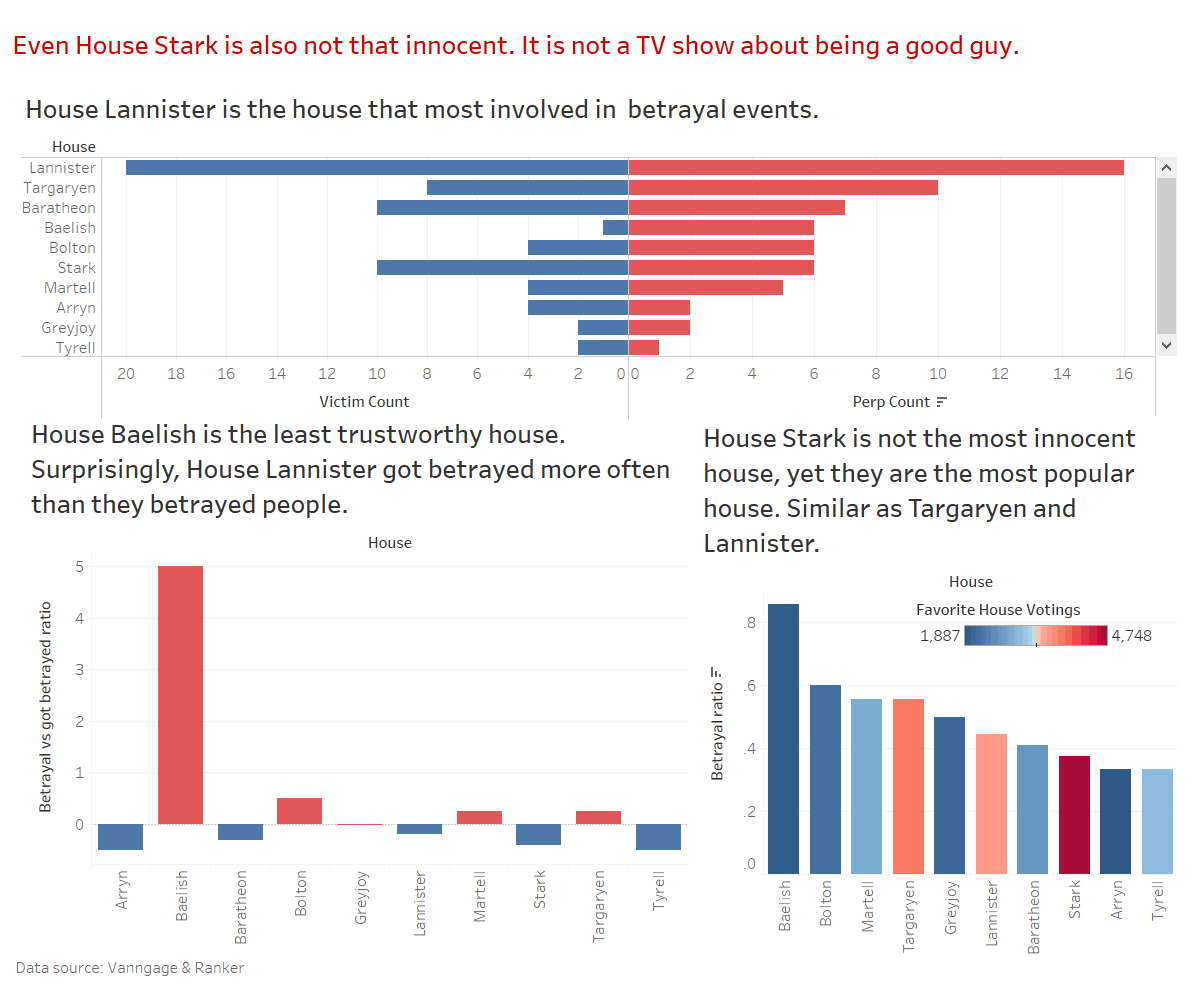

In [9]:
#Result after Tableau:
from IPython.display import Image
Image("betrayal_by_house.png")

### Finding 3: Popularity of Main Characters and Gender Perceptions

In [ ]:
surv = pd.read_csv("https://raw.githubusercontent.com/allisonyanc/Viz-Group-Project/master/GoT_char_survey.csv")

surv.info()

In [ ]:
#create a ratio of likes to dislikes

surv['ratio'] = surv['Votes Liked Most']/surv['Votes Liked Least']


In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
clrs = ['#5499C7', '#73C6B6', '#73C6B6', '#5499C7', '#5499C7', '#5499C7', '#73C6B6', '#73C6B6', '#5499C7', '#5499C7', '#5499C7', '#5499C7', '#73C6B6', '#73C6B6']

g_ratio = sns.barplot(x=surv["Character"], y=surv['ratio'], palette=clrs)
g_ratio.set_xticklabels(g_ratio.get_xticklabels(), rotation=45)
plt.title("Most Popular and Least Popular GoT Main Characters")
plt.ylabel("Popularity Score (Ratio of Most Liked to Least Liked)")


In the plot above, female characters have green bars and males have blue bars.  From the barplot of the ratios of likes versus dislikes for each major character, we can see that Tyrion and Jaime are the best liked characters, since their ratios are the highest.  It's also interesting to note that aside from Arya, all the female leads have very low ratios of likes to dislikes, meaning they are not as well-liked.  In contrast, the male leads are relatively well-liked, even though they generally commit similar amounts and types of crimes to their female counterparts.  This suggests that perhaps gender discrimination is prominent even for fictional characters, such as those from Game of Thrones.

**The Making Of:**

The data for this graph is from a Reddit survey taken in January 2017 based on the book, "A Song of Fire and Ice", which the TV show "Game of Thrones" was adapted from.  We couldn't find full survey results based on the TV show itself, but this survey only includes people who both read the books and watch the show, and most voters felt that these main characters were well-adapted from the book to the show (this data is also available in the same survey).  For these reasons, we felt that it was logical to extrapolate the results to the TV show as well.  The Reddit post linking to the survey results is: https://www.reddit.com/r/asoiaf/comments/5nphj8/spoilers_extended_results_for_the_survey_from_jan/

The actual survey results data is in Google Forms here: https://docs.google.com/forms/d/e/1FAIpQLSeH-ub0yPsYmtbx0pSFknIEwJNC_eev9788ARZO72KQPACgLg/viewanalytics

Because the format of the Google Forms results was not a spreadsheet, the numbers were manually entered into an Excel CSV file.  We are just interested in the main characters, so the main characters' names and each of their votes for "most liked" and "least liked" were added to the CSV.

Next, the data was read into Python and we created a new 'ratio' column representing the "most liked" votes divided by "least liked" votes, which is a metric for popularity.  Then this ratio for each character was shown in a barplot.  The plot showed that popularity differs significantly between the genders, so then the genders were color-coded in the barplot and a 'Gender' column was added to the original CSV file.

**Future enhancements:**

In the next iteration, we would like to use the "Gender" variable to create a legend.  We would also like to relate the characters' popularity to another dimension outside of the storyplot, such as the level of moral ambiguity of each character. This ambiguity can be measured using the Betrayals dataset we used for another finding here.  
The concept and growing popularity of morally ambiguous TV and movie characters is described in a paper by A. Eden et al. (2016) and can be found here: https://www.tandfonline.com/doi/full/10.1080/15213269.2016.1182030 